# Mobile Roboter

Mobile Roboter unterscheiden sich von anderen Robotern durch die Fähigkeit sich fortzubewegen.

## Arten der Fortbewegung

### Rollend

<img src="images/warehouse.gif" width="400">

Quelle: https://money.cnn.com/

<img src="images/curiosity.gif" width="400">

Quelle: https://www.nationalgeographic.com/

<img src="images/roomba.gif" width="400">

Quelle: https://www.bbc.com/

### Laufend

<img src="images/spot.gif" width="400">

Quelle: https://www.bostondynamics.com/

<img src="images/atlas.gif" width="400">

Quelle: https://www.bostondynamics.com/

### Fliegend

<img src="images/amazon.gif" width="400">

Quelle: https://www.amazon.com/Amazon-Prime-Air

### Schwimmend

<img src="images/festo.gif" width="400">

Quelle: https://www.festo.com/

## Der Zustand

Im folgenden werden wir einen 2D mobilen Roboter programmieren, der sich in seiner eigenen 2D Welt fortbewegt. Diese Welt ist zunächst leer. Sie hat eine Breite x und eine Höhe y. Ihr könnt sie euch wie eine große leere Fläche vorstellen, auf der sich der Roboter bewegen wird.


In [1]:
# Imports
import sys
sys.path.append('mobilerobot')
from IPython.display import HTML
from world import SimpleWorld
from robot import Robot
%matplotlib notebook

<IPython.core.display.Javascript object>


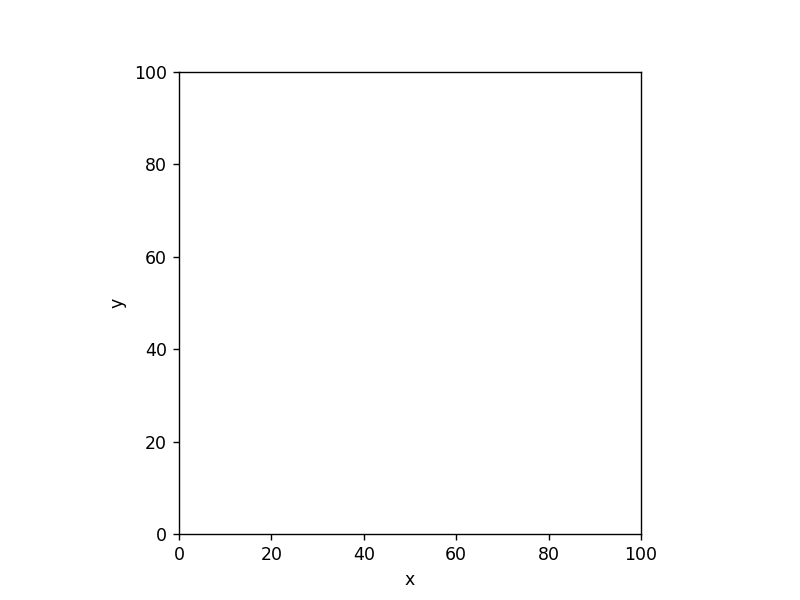

In [2]:
world = SimpleWorld(x=100, y=100)
world.showScene()

Dieser Welt können wir nun einen Roboter hinzufügen, indem wir bei der Instanzierung eine Liste mit Roboterobjekten (``robots``) übergeben. Diese Liste erhält zunächst nur einen einzelnen Wert.

<IPython.core.display.Javascript object>


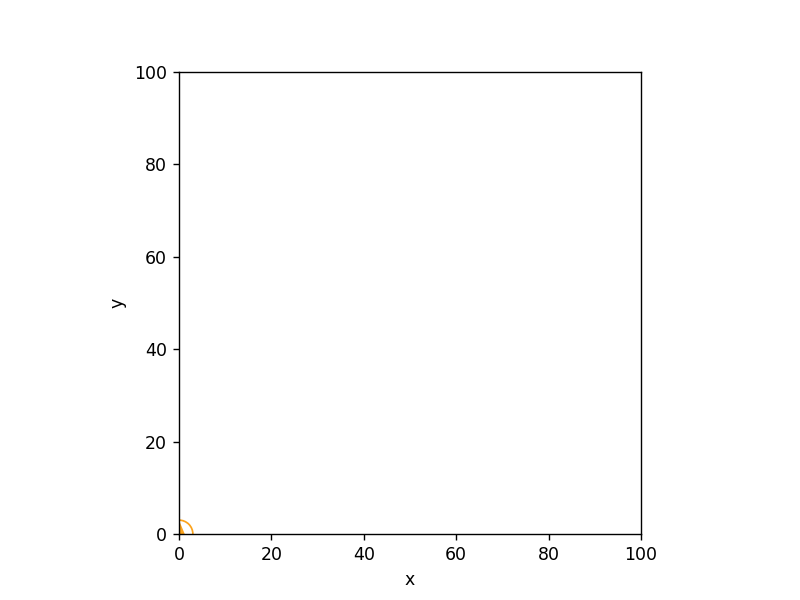

In [3]:
robot = Robot(radius=3)

world = SimpleWorld(x=100, y=100, robots=[robot])
world.showScene()

Durch drei Parameter können wir den Zustand des Roboters in der Welt beschreiben. Zwei Parameter beschreiben die Position (``x`` und ``y``) und einer beschreibt die Rotation des Roboters (``theta``). Ist ``theta`` 0, so ist der Roboter nach oben ausgerichtet. Bei 90 nach links, bei 180 nach unten und bei -90 nach rechts. Zu jedem dieser Werte können wir 360 hinzu- oder abziehen, ohne dass sich der Zustand des Roboters ändert. Es ist also egal, ob wir -90 oder 270 schreiben, in beiden Fällen zeigt der Roboter nach rechts.

Der Roboter ist ganz klein in der linken unteren Ecke zu erkennen. Das liegt daran, dass bei der Initialisierung die Werte für ``x``, ``y`` und ``theta`` 0 sind.

**Aufgabe**: Ändere den Zustand des Roboters durch Modifizierung der Zustandsparamter in der ``setState``-Funktion.

<IPython.core.display.Javascript object>


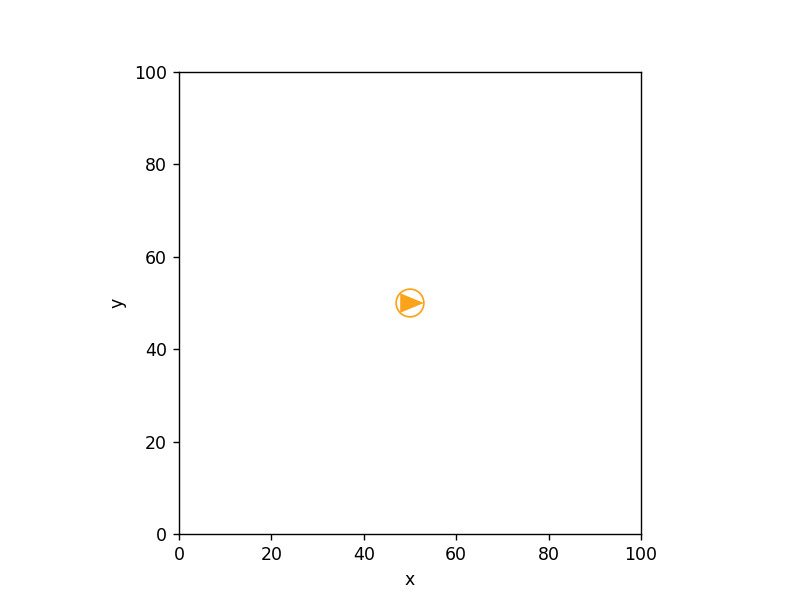

In [4]:
robot = Robot(radius=3)

robot.setState(x=50, y=50, theta=-90)

world = SimpleWorld(x=100, y=100, robots=[robot])
world.showScene()

Für die Beschreibung der dreidimensionalen Welt benötigen wir sechs Parameter. Diese sind ``x``, ``y`` und ``z`` sowie drei Orientierungswinkel ``alpha``, ``beta`` und ``gamma``.

Damit sich der Roboter fortbewegt müssen wir eine Zustandsveränderung herbeiführen. Die ``Robot``-Klasse hat dafür drei Funktionen. Diese sind ``moveForward(distance)``, ``rotateRight(angle)`` und ``rotateLeft(angle)``. In der folgenden Zelle wird die Funktion ``move`` ``robot.controller`` zugewiesen. Wenn die Animation gestartet wird, wird in jedem Frame diese Funktion einmal ausgeführt. So können wir bewirken, dass sich der Roboter kontinuierlich fortbewegt.

<IPython.core.display.Javascript object>


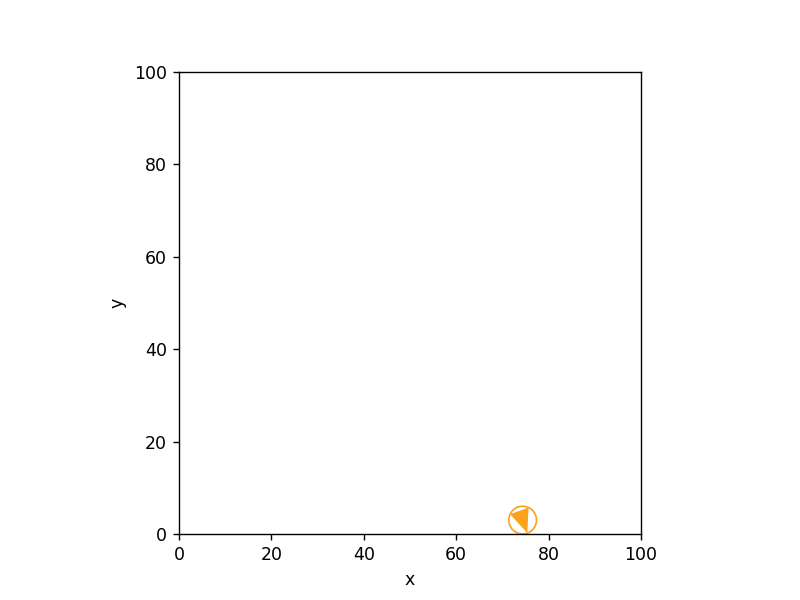

In [12]:
robot = Robot(radius=3)
robot.setState(x=50, y=70, theta=200)

def move(self):
    self.moveForward(0.01)

robot.controller = move

world = SimpleWorld(x=100, y=100, robots=[robot])
anim = world.initAnimation()

Im Ordner ``exercises`` findet iht verschiedene Aufgaben. In der ersten Aufgabe wird eine Welt mit drei Robotern generiert. Jedem dieser Roboter wird eine ``move`` Funktion als ``controller`` zugewiesen. Deine Aufgabe ist es, diese ``move`` Funktionen zu füllen, sodass sich einer der Roboter nach vorne bewegt, einer nach links dreht und einer nach rechts dreht.

**Aufgabe**: Löse ``exercise01.py``

## Bewegung zu einem Ziel

Wir haben gelernt, wie wir die Roboter in der Welt bewegen können. Doch bisher steuern die Roboter noch kein Ziel an. Dafür verändern wir die Welt etwas und führen eine Lichtquelle ein, die das Ziel der Roboter darstellt.

<IPython.core.display.Javascript object>


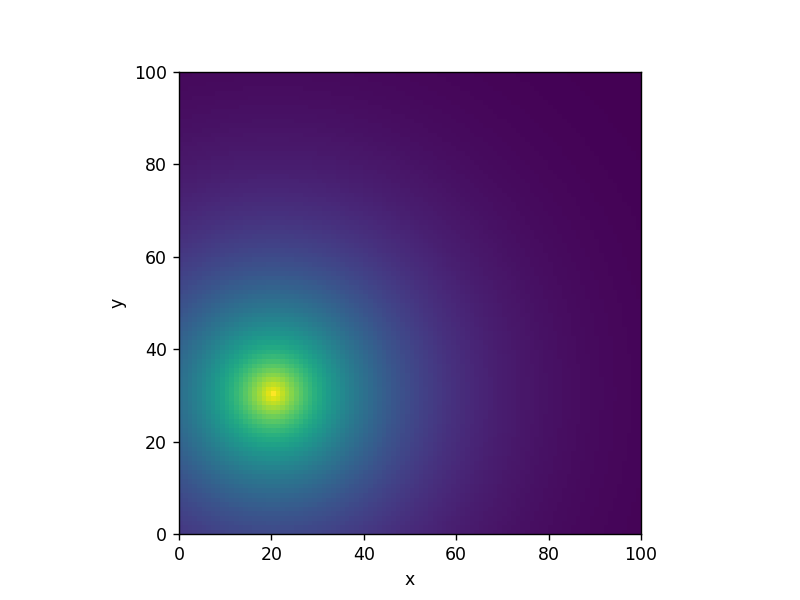

In [2]:
from light import Light
from world import LightWorld

l = Light(x=20, y=30)

world = LightWorld(x=100, y=100, robots=[], light=l)

world.showScene()

Zusätzlich statten wir die Roboter mit zwei Lichtsensoren aus. Diese werden rechts und links am Roboter befestigt. Mit der Funktion ``lightMesurement`` können wir die Werte auslesen.

**Aufgabe**: Modifiziere den anfänglichen Zustand des Roboters und beobachte, wie sich die Messungen der Sensoren verhalten.

Sensor rechts: 0.06, Sensor links 0.02


<IPython.core.display.Javascript object>


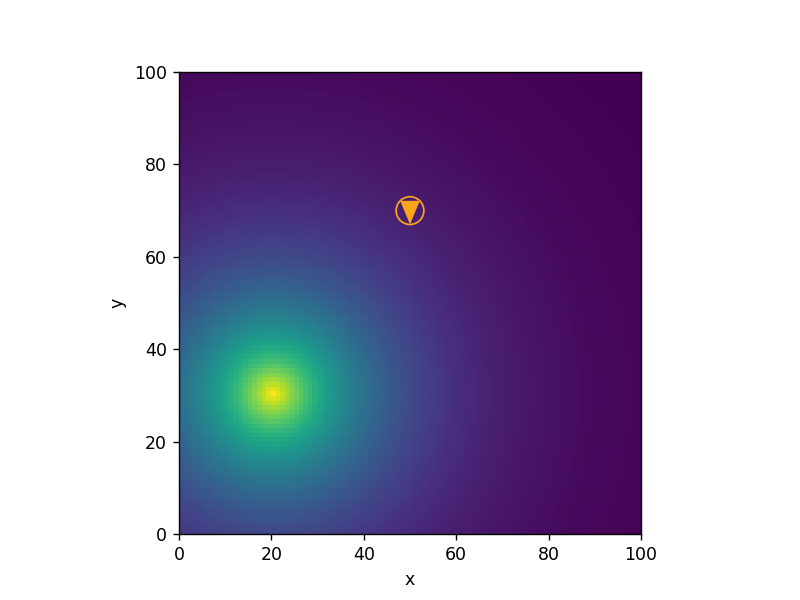

In [5]:
r = Robot(radius=3)
r.setState(x=50, y=70, theta=180)

rm, lm = r.lightMeasurement(l)

print(f'Sensor rechts: {rm:.2f}, Sensor links {lm:.2f}')

world = LightWorld(x=100, y=100, robots=[r], light=l)

world.showScene()

Die Messwerte wollen wir nun dazu nutzen, den Roboter zu seinem Ziel zu navigieren. Die Funktion, mit der wir den Roboter steuern hat nun nicht mehr nur den Roboter selber als Parameter, sondern zudem die Messwerte der zwei Sensoren des Roboters.
In ``exercise02.py`` sollst du diese Funktion nun so modifizieren, dass der Roboter sich zu der Lichtquelle hinbewegt und dort stehen bleibt. Ändere die Funktion dazu zunächst so um, dass sich der Roboter zum Licht dreht. Reagiere dazu auf den Unterschied der beiden Messwerte. Bewege den Roboter anschließend vorwärts, sodass er langsamer wird, je näher er der Lichtquelle kommt. Nutze dazu die Summe der beiden Messwerte. Wenn der Roboter das Ziel erreicht hat, beträgt die Summe 1.0.

**Aufgabe**: Löse ``exercise02.py``

In [ ]:
def move(robot, rightMeasurement, leftMeasurement):
    pass
    
r.controller = move

## Hindernisse umfahren

Normalerweise hat ein mobiler Roboter nicht so viel Platz um sich fortzubewegen. In der realen Welt gibt es Hindernisse, die umfahren werden müssen. In der folgenden Zelle wird eine Welt generiert, in der sich in der Mitte ein riesiger Graben befindet, den der Roboter umfahren muss.

<IPython.core.display.Javascript object>


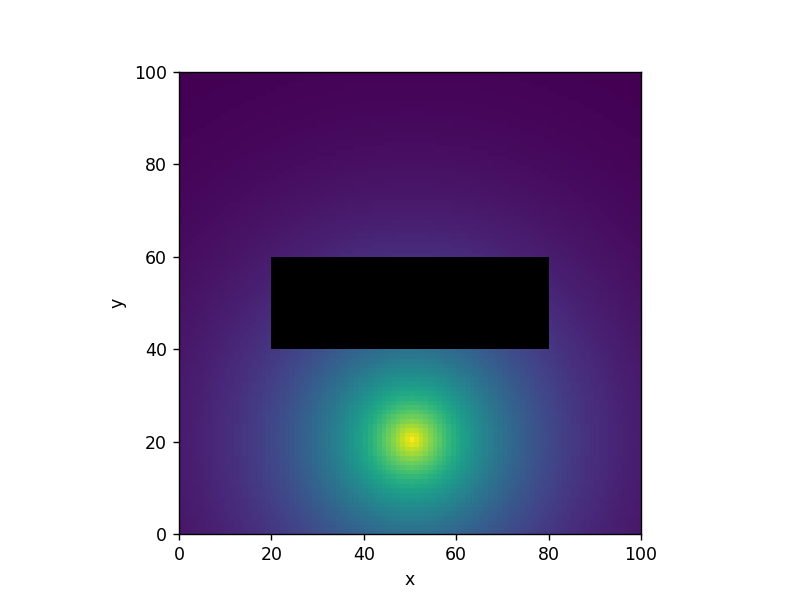

In [14]:
from obstacle import Obstacle
from world import LightObstacleWorld

o = Obstacle(20, 40, 60, 20)

world = LightObstacleWorld(x=100, y=100, robots=[], light=l, obstacles=[o])
world.showScene()

In ``exercise03.py`` ist es deine Aufgabe, diesen Graben zu umfahren und zum Ziel - der Lichtquelle - zu gelangen. Der Roboter reagiert weiterhin auf die Lichtsensoren. Zusätzlich hat einen Sensor an seiner Spitze, mit dem er das Hindernis in unmittelbarer Nähe erkennt. Bekommt der Roboter einen Fahrbefehl, den er nicht ausführen kann, so bleibt er einfach stehen. Der Rückgabewert des Fahrbefehls ist dann ``False``.

**Aufgabe**: Löse ``exercise04.py``

<IPython.core.display.Javascript object>


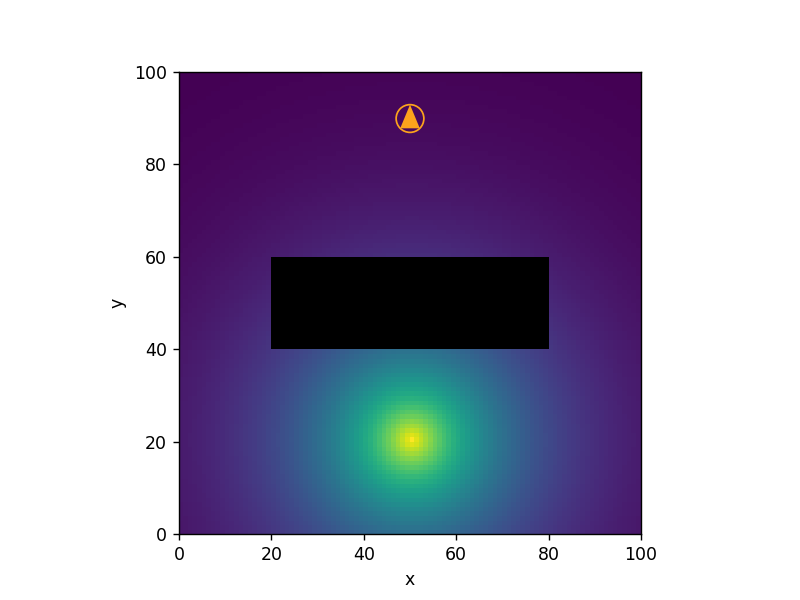

In [22]:
r = Robot(radius=3)
r.setState(x=50, y=80, theta=180)

o = Obstacle(20, 40, 60, 20)
l = Light(x=50, y=20)

def move(robot, rightMeasurement, leftMeasurement):
    free = robot.moveForward(0.01)
    if not free:
        robot.rotateLeft(180)
    
r.controller = move

world = LightObstacleWorld(x=100, y=100, robots=[r], light=l, obstacles=[o])
anim = world.initAnimation()

**Bonus**: Schaffst du es auch das Hindernis in ``exercise04.py`` zu umfahren?

<IPython.core.display.Javascript object>


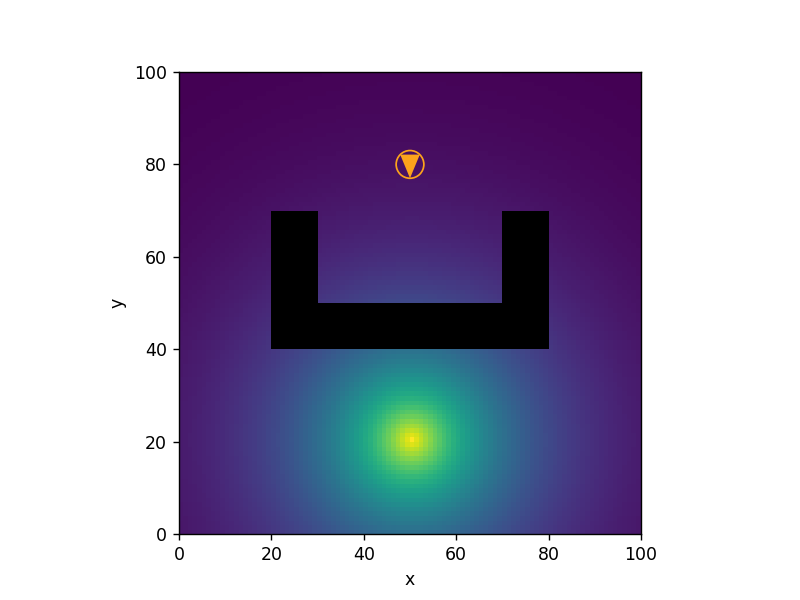

In [25]:
r = Robot(radius=3)
r.setState(x=50, y=80, theta=180)

o1 = Obstacle(20, 40, 60, 10)
o2 = Obstacle(20, 40, 10, 30)
o3 = Obstacle(70, 40, 10, 30)

world = LightObstacleWorld(x=100, y=100, robots=[r], light=l, obstacles=[o1, o2, o3])
world.showScene()

## Pfadplanung

Bisher haben wir einen "brainless" Roboter erschaffen, der nur auf unmittelbare Sensormessungen reagieren kann. Wenn jedoch der Zustand des Roboter und 